In [ ]:
import numpy as np
import pandas as pd
import glob
import math
from sklearn.model_selection import train_test_split
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
# Reading Orders Data for 3 Weeks
files = glob.glob("/content/drive/MyDrive/training_data/order_data/*")
li = []

for f in files:
    print(f'Reading File {f}')
    df = pd.read_csv(f, delim_whitespace=True, header=None)
    li.append(df)
    
# Merging Orders to Single Order File
print('Merging....')
orders_data = pd.concat(li, axis=0, ignore_index=True)
orders_data.columns = ['order_id','driver_id','passenger_id','start_region_hash','dest_region_hash','Price','Date','Time']
print('Orders Data Sucessfully Read!!!')

Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-02
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-05
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-03
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-04
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-01
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-16
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-14
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-07
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-11
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-17
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-10
Reading File /content/drive/MyDrive/training_data/order_data/order_data_2016-01-09
Read

In [ ]:
# Reading Weathers Data for 3 Weeks
files = glob.glob("/content/drive/MyDrive/training_data/weather_data/*")
li = []

for f in files:
    print(f'Reading File {f}')
    df = pd.read_csv(f, delim_whitespace=True, header=None)
    li.append(df)
    
# Merging Orders to Single Order File
print('Merging....')
weather_data = pd.concat(li, axis=0, ignore_index=True)
weather_data.columns = ['Date','Time','Weather','Temperature','PM2.5']
print('Weather Data Sucessfully Read!!!')

Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-05
Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-17
Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-09
Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-04
Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-20
Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-03
Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-18
Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-02
Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-08
Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-14
Reading File /content/drive/MyDrive/training_data/weather_data/weather_data_2016-01-10
Reading File /content/drive/MyDrive/trainin

In [ ]:
# Reading Regions Information

f = "/content/drive/MyDrive/training_data/cluster_map/cluster_map"
print(f'Reading File {f}')

regions_data = pd.read_csv(f, delim_whitespace=True, header=None)
regions_data.columns = ['region_hash','region_id']

print('Regions Data Sucessfully Read!!!')

Reading File /content/drive/MyDrive/training_data/cluster_map/cluster_map
Regions Data Sucessfully Read!!!


In [ ]:
# Reading POI Information

f = "/content/drive/MyDrive/training_data/poi_data/poi_data"
print(f'Reading File {f}')

poi_data = pd.read_csv(f, delimiter=',', header=None)
poi_data.columns = ['region_hash','poi_class']

print('POI Data Sucessfully Read!!!')

Reading File /content/drive/MyDrive/training_data/poi_data/poi_data
POI Data Sucessfully Read!!!


In [ ]:
# Function to Calculate Timeslot Number provided time
def get_timeslot(time_str):
    
    time_list = time_str.split(':')
    hour, minute, second = int(time_list[0]), int(time_list[1]), int(time_list[2])
    timeslot = ((hour * 3600) + (minute * 60) + second) // 600 + 1
    
    return timeslot

In [ ]:
# Function to Check if a Ride was Accepted or Not
def get_accept_status(hashVal):
    
    if hashVal != hashVal:
        return 0
    else:
        return 1

In [ ]:
# Adding Classes as Columns in POI Data
li = []
for i in poi_data['poi_class']:
    classes = i.split("\t")
    
    for j in classes:
        fac = j.split(":")
        c = fac[0].split("#")

        for k in c:
          li.append('Class-'+k)


li = list(set(li))
poi_data  = pd.concat(
    [
        poi_data,
        pd.DataFrame(
            0,
            index=poi_data.index, 
            columns=li
        )
    ], axis=1
)

In [ ]:
# Adding Number of Facilities of Each Class in POI Data
for index,row in poi_data.iterrows():
    classes = row['poi_class'].split("\t")
    for j in classes:
        fac = j.split(":")
        c = fac[0].split("#")

        for k in c:
          poi_data.at[index,'Class-'+k] += int(fac[1])
poi_data = poi_data.drop(['poi_class'], axis=1)

In [ ]:
# Displaying POI Data
poi_data

,region_hash,Class-25,Class-14,Class-1,Class-22,Class-12,Class-3,Class-8,Class-16,Class-20,...,Class-4,Class-6,Class-18,Class-24,Class-2,Class-19,Class-10,Class-17,Class-21,Class-15
0,74c1c25f4b283fa74a5514307b0d0278,17928,13031,187165,7470,8549,64906,186086,46397,196959,...,139689,41998,4648,140851,86486,87233,22991,44654,0,29050
1,08f5b445ec6b29deba62e6fd8b0325a6,830,12035,6889,83,1494,5561,3486,5644,2407,...,6142,1660,83,332,3818,11371,2905,913,498,1743
2,4b7f6f4e2bf237b6cc58f57142bea5c0,3071,913,21414,1909,2324,12616,13529,8881,18509,...,15936,3154,664,7885,8798,22576,1826,3237,83,5893
3,a814069db8d32f0fa6e188f41059c6e1,3652,1162,15355,6806,1992,9628,18426,6308,31291,...,16849,3818,581,2988,8466,33615,1079,1909,83,4565
4,8316146a6f78cc6d9f113f0390859417,1079,498,7055,498,498,5810,2490,5063,3071,...,5561,498,415,1743,3486,11537,996,498,166,2075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,d4ec2125aff74eded207d2d915ef682f,60839,46729,617354,8051,20086,347687,624160,153633,678110,...,526635,169071,7304,493684,296725,502731,79265,119437,83,141515
62,82cc4851f9e4faa4e54309f8bb73fd7c,23074,10790,331336,12367,18509,137780,215219,66732,233396,...,264943,71546,5063,259956,167155,232400,38678,58259,0,49890
63,fff4e8465d1e12621bc361276b6217cf,2407,913,11122,498,415,8549,7968,6557,10126,...,10873,2739,664,1162,4565,18260,747,996,0,3901
64,b05379ac3f9b7d99370d443cfd5dcc28,13197,3486,124417,7885,11537,51875,114125,36105,171478,...,121927,31955,2158,85490,77688,97608,17845,28137,83,17015


In [ ]:
# Calculating Timeslot and Status for Each Order
orders_data['Timeslot'] = orders_data['Time'].apply(get_timeslot)
orders_data['Status'] = orders_data['driver_id'].apply(get_accept_status)
orders_data = orders_data.drop(['driver_id','order_id','dest_region_hash','passenger_id','Time'],axis=1)

In [ ]:
# Grouping Data to Calculate Demand Supply Gap
gap_data = orders_data.groupby(['start_region_hash','Date','Timeslot']).agg({'Price': 'mean', 'Status': lambda x: len(x) - sum(x==1)}).reset_index()
gap_data.columns = ['start_region_hash', 'Date', 'Timeslot', 'Average Price', 'Demand-Supply Gap']
gap_data

,start_region_hash,Date,Timeslot,Average Price,Demand-Supply Gap
0,08232402614a9b48895cc3d0aeb0e9f2,2016-01-01,6,17.50,2
1,08232402614a9b48895cc3d0aeb0e9f2,2016-01-01,7,32.00,1
2,08232402614a9b48895cc3d0aeb0e9f2,2016-01-01,8,30.00,0
3,08232402614a9b48895cc3d0aeb0e9f2,2016-01-01,14,91.00,0
4,08232402614a9b48895cc3d0aeb0e9f2,2016-01-01,15,94.00,1
...,...,...,...,...,...
163486,fff4e8465d1e12621bc361276b6217cf,2016-01-21,138,11.25,4
163487,fff4e8465d1e12621bc361276b6217cf,2016-01-21,139,63.50,1
163488,fff4e8465d1e12621bc361276b6217cf,2016-01-21,142,19.00,0
163489,fff4e8465d1e12621bc361276b6217cf,2016-01-21,143,13.00,1


In [ ]:
# Joining Demand-Supply Data with Region Table based on Hash to Get Region ID
gap_data = pd.merge(gap_data, regions_data, left_on='start_region_hash', right_on='region_hash')

# Cleaning Demand-Supply Data
gap_data = gap_data.drop(['start_region_hash'],axis=1)
gap_data = gap_data[['region_hash', 'region_id','Date','Timeslot','Average Price','Demand-Supply Gap']]

In [ ]:
# Calculating Timeslot for Each Weather Report
weather_data['Timeslot'] = weather_data['Time'].apply(get_timeslot)

# Cleaning Weather Data
weather_data = weather_data.drop_duplicates(subset=['Date', 'Timeslot'], keep='first')
weather_data = weather_data.reset_index(drop=True)

In [ ]:
# Adding Nearest Weather Records For Missing Timeslots in Weather Data
filled_weather_data = pd.DataFrame(columns=weather_data.columns)

for date in weather_data['Date'].unique():
    date_weather_data = weather_data[weather_data['Date'] == date]

    for timeslot in range(1, 145):

        if timeslot not in date_weather_data['Timeslot'].unique():

            nearest_record = date_weather_data.iloc[(date_weather_data['Timeslot'] - timeslot).abs().argsort()[:1]]
            new_record = pd.DataFrame(columns=date_weather_data.columns)
            new_record['Date'] = nearest_record['Date']
            new_record['Timeslot'] = timeslot
            new_record['Weather'] = nearest_record['Weather']
            new_record['Temperature'] = nearest_record['Temperature']
            new_record['PM2.5'] = nearest_record['PM2.5']
            new_record['Time'] = 'NULL'

            filled_weather_data = pd.concat([filled_weather_data,new_record], ignore_index=True)
        else:

            filled_weather_data = pd.concat([filled_weather_data,date_weather_data[date_weather_data['Timeslot'] == timeslot]], ignore_index=True)

weather_data = filled_weather_data
weather_data = weather_data.drop(['Time'],axis=1)

In [ ]:
# Displaying Weather Data
weather_data

,Date,Weather,Temperature,PM2.5,Timeslot
0,2016-01-05,4,12.0,170,1
1,2016-01-05,8,12.0,170,2
2,2016-01-05,4,12.0,170,3
3,2016-01-05,4,12.0,170,4
4,2016-01-05,4,12.0,165,5
...,...,...,...,...,...
3019,2016-01-15,2,5.0,134,140
3020,2016-01-15,2,5.0,134,141
3021,2016-01-15,2,5.0,134,142
3022,2016-01-15,2,5.0,132,143


In [ ]:
def date_to_weekday(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    weekday_num = date_obj.weekday()
    return weekday_num

In [ ]:
# Creating Denormalized Table
denorm = pd.merge(gap_data, weather_data, on=['Date','Timeslot'], how='inner')
denorm = pd.merge(denorm, poi_data, left_on='region_hash', right_on='region_hash', how='inner')
denorm['Weekday'] = denorm['Date'].apply(date_to_weekday)
# Cleaning Denormalized Table
denorm = denorm.drop(['region_hash'],axis=1)
denorm = denorm.drop(['Date'],axis=1)
denorm = denorm.sort_values(by=['region_id', 'Weekday', 'Timeslot']).reset_index(drop=True)

In [ ]:
# Denormalized Table
denorm

,region_id,Timeslot,Average Price,Demand-Supply Gap,Weather,Temperature,PM2.5,Class-25,Class-14,Class-1,...,Class-6,Class-18,Class-24,Class-2,Class-19,Class-10,Class-17,Class-21,Class-15,Weekday
0,1,1,15.750000,3,2,13.0,187,8051,4565,105161,...,57353,996,65653,78186,76775,13280,25315,0,12782,0
1,1,1,11.880952,11,4,8.0,121,8051,4565,105161,...,57353,996,65653,78186,76775,13280,25315,0,12782,0
2,1,1,19.375000,7,3,3.0,88,8051,4565,105161,...,57353,996,65653,78186,76775,13280,25315,0,12782,0
3,1,2,13.404255,5,2,13.0,187,8051,4565,105161,...,57353,996,65653,78186,76775,13280,25315,0,12782,0
4,1,2,10.612903,8,4,8.0,121,8051,4565,105161,...,57353,996,65653,78186,76775,13280,25315,0,12782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163486,66,143,9.000000,0,4,8.0,121,3652,4648,15604,...,12450,664,3154,15687,14940,3569,4067,581,13280,6
163487,66,143,12.444444,0,2,14.0,187,3652,4648,15604,...,12450,664,3154,15687,14940,3569,4067,581,13280,6
163488,66,144,8.000000,0,2,13.0,187,3652,4648,15604,...,12450,664,3154,15687,14940,3569,4067,581,13280,6
163489,66,144,6.500000,0,4,8.0,121,3652,4648,15604,...,12450,664,3154,15687,14940,3569,4067,581,13280,6


In [ ]:
#Splitting Independent and Dependent Features

y = np.array(denorm['Demand-Supply Gap'])
x = np.array(denorm.drop(['Demand-Supply Gap'],axis=1))

In [ ]:
#Splitting Data into Training and Testing

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
#Labeling Test Data for Later

testData = pd.DataFrame(x_test)
testData = testData.iloc[:, [0,1]]
testData.columns = ['region_id','Timeslot']
testData['gap'] = y_test

In [ ]:
# Model Evaluation
def meanAbsoluteError(prediction, target):
    
    sums = []
    vals = []
    sum = 0
    reg = 0
    for i in range(0,66):
      sums.append(0)
      vals.append(0)

    for index,row in target.iterrows():

      sums[row['region_id']-1]+= abs(row['gap']-prediction[index])
      vals[row['region_id']-1]+=1

    for i,j in zip(sums,vals):

      if j!=0:
        sum+=(i/j)
        reg+=1


    return sum/reg

In [ ]:
# Function to plot learning curve
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Mean Absolute Error')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()

In [ ]:
# Using Linear Regression Model
from sklearn.linear_model import LinearRegression

linRegression = LinearRegression()
linRegression.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicting Data Using Linear Regression Model
preds_linearR = linRegression.predict(x_test)

In [ ]:
# Printing Mean Absolute Error in Linear Regression Model
error = meanAbsoluteError(preds_linearR,testData)
print(f'Error in Linear Regression Model: {error}')

Error in Linear Regression Model: 10.221152975639576


In [ ]:
# Accuracy of Linear Regression Model
print(f'Accuracy of Linear Regression Model: {(linRegression.score(x_test,y_test)*100):.2f}%')

Accuracy of Linear Regression Model: 14.86%


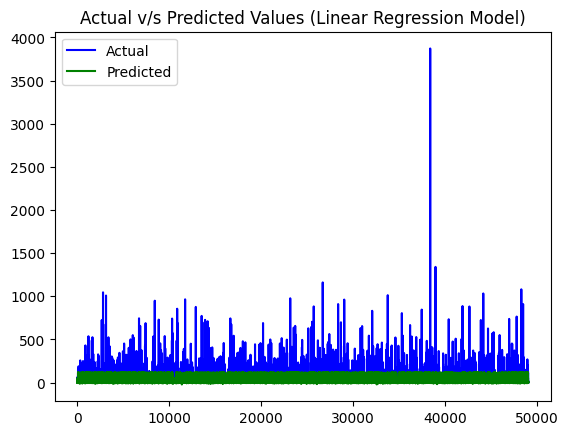

In [ ]:
# Plotting Actual v/s Predicted Data Using Linear Regression Model
plotData = testData
plotData['preds'] = preds_linearR

plt.plot(plotData.index, plotData['gap'], color='blue', label='Actual')
plt.plot(plotData.index, plotData['preds'], color='green', label='Predicted')
plt.title('Actual v/s Predicted Values (Linear Regression Model)')
plt.legend()

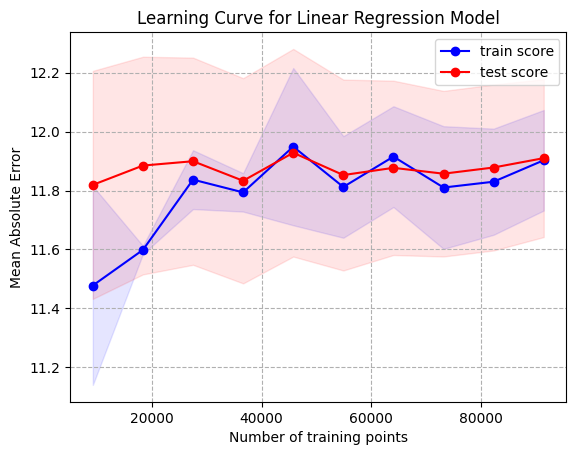

In [ ]:
# Plotting Learning Curve for Linear Regression
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(linRegression, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10))
plot_learning_curve(train_sizes, train_scores, test_scores, 'Learning Curve for Linear Regression Model')

In [ ]:
# Using Decision Tree Regression Model
from sklearn import tree
decTree = tree.DecisionTreeRegressor(max_depth=25)
decTree = decTree.fit(x_train, y_train)

In [ ]:
# Predicting Data Using Decision Tree Regression Model
preds_decTree = decTree.predict(x_test)

In [ ]:
# Printing Mean Absolute Error in Decision Tree Regression
error = meanAbsoluteError(preds_decTree,testData)
print(f'Error in Decision Tree Regression Model: {error}')

Error in Decision Tree Regression Model: 4.354544990339788


In [ ]:
# Accuracy of Decision Tree Regression Model
print(f'Accuracy of Decision Tree Regressor : {(decTree.score(x_test,y_test)*100):.2f}%')

Accuracy of Decision Tree Regressor : 79.21%


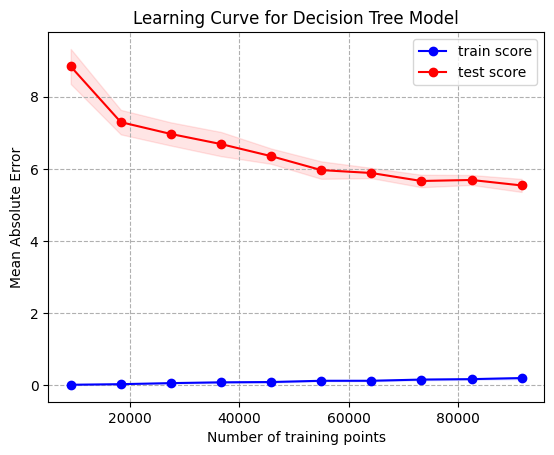

In [ ]:
# Plotting Learning Curve for Decision Tree Regression
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(decTree, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10))
plot_learning_curve(train_sizes, train_scores, test_scores, 'Learning Curve for Decision Tree Model')

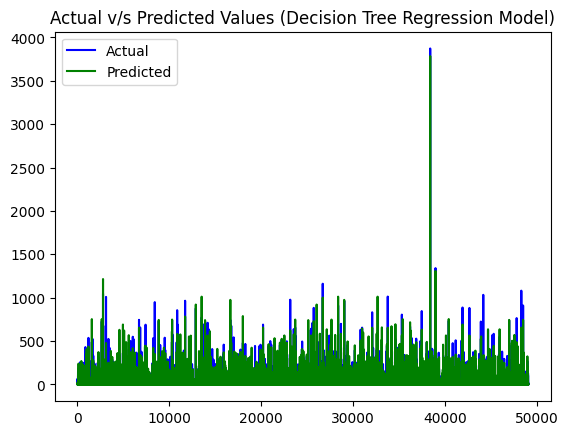

In [ ]:
# Plotting Actual v/s Predicted Data Using Decision Tree Regression Model
plotData = testData
plotData['preds'] = preds_decTree

plt.plot(plotData.index, plotData['gap'], color='blue', label='Actual')
plt.plot(plotData.index, plotData['preds'], color='green', label='Predicted')
plt.title('Actual v/s Predicted Values (Decision Tree Regression Model)')
plt.legend()

In [194]:
# Using Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
forestModel = RandomForestRegressor(max_depth=25, random_state=0)
forestModel.fit(x_train, y_train)

RandomForestRegressor(max_depth=25, random_state=0)

In [195]:
# Predicting Data Using Random Forest Model
preds_randomForest = forestModel.predict(x_test)

In [196]:
# Printing Mean Absolute Error in Random Forest Model
error = meanAbsoluteError(preds_randomForest,testData)
print(f'Error in Random Forest Model: {error}')

Error in Random Forest Model: 3.528909151449168


In [197]:
# Accuracy of Random Forest Regression Model
print(f'Accuracy of Random Forest Regressor : {(forestModel.score(x_test,y_test)*100):.2f}%')

Accuracy of Random Forest Regressor : 87.68%


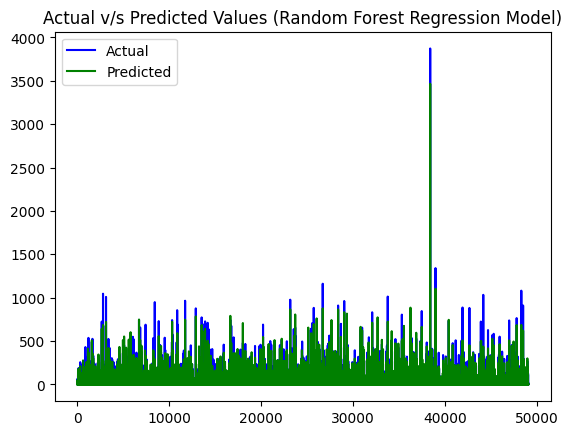

In [198]:
# Plotting Actual v/s Predicted Data Using Random Forest Model
plotData = testData
plotData['preds'] = preds_randomForest
plt.plot(plotData.index, plotData['gap'], color='blue', label='Actual')
plt.plot(plotData.index, plotData['preds'], color='green', label='Predicted')
plt.title('Actual v/s Predicted Values (Random Forest Regression Model)')
plt.legend()

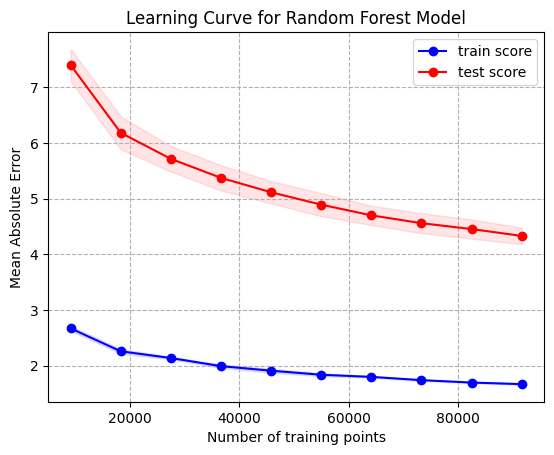

In [201]:
# Plotting Learning Curve for Random Forest Regression
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(forestModel, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10))
plot_learning_curve(train_sizes, train_scores, test_scores, 'Learning Curve for Random Forest Model')

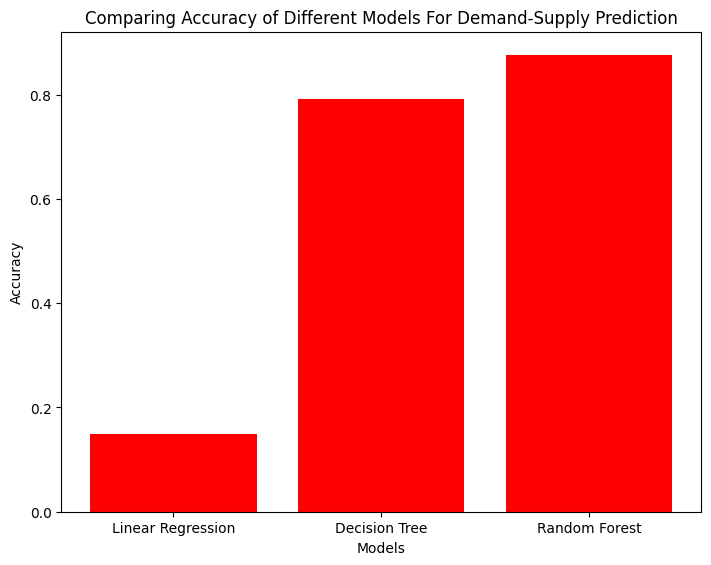

In [199]:
# Model Comparison (Accuracy)
x = ['Linear Regression', 'Decision Tree', 'Random Forest']
y = [linRegression.score(x_test,y_test), decTree.score(x_test,y_test), forestModel.score(x_test,y_test) ]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparing Accuracy of Different Models For Demand-Supply Prediction')
ax.bar(x,y,color='red')
plt.show()

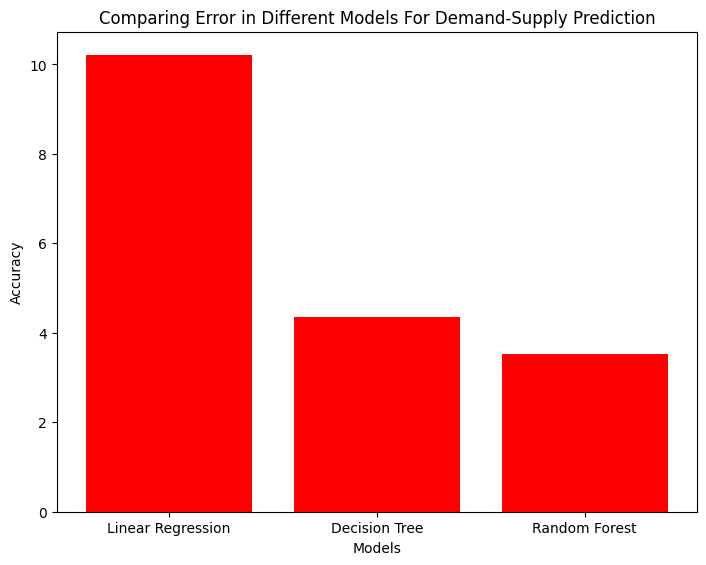

In [200]:
# Model Comparison (Error)
x = ['Linear Regression', 'Decision Tree', 'Random Forest']
y = [meanAbsoluteError(preds_linearR,testData), meanAbsoluteError(preds_decTree,testData), meanAbsoluteError(preds_randomForest,testData) ]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparing Error in Different Models For Demand-Supply Prediction')
ax.bar(x,y,color='red')
plt.show()